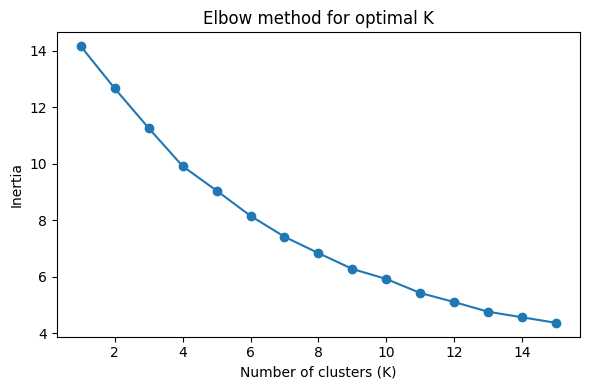

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# ---- CONFIG ----
U_FACTORS_PATH = "/Users/oliviapc/Documents/GitHub/fastapi_recommender/src/fastapi_recommender/Recommendation_System_Logic_Code/U_factors.npy"
MAX_K = 15

if os.path.isfile(U_FACTORS_PATH):
    X = np.load(U_FACTORS_PATH)
else:
    X = np.random.randn(1000, 10)

inertias = []
K_vals = range(1, MAX_K + 1)
for k in K_vals:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(K_vals), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow method for optimal K")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tqdm import tqdm

def mapk(actual, predicted, k=10):
    hits = 0
    for a, p in zip(actual, predicted):
        hits += len(set(a[:k]) & set(p[:k])) / k
    return hits / len(actual)

alphas = np.linspace(0.3, 0.9, 7)
betas  = np.linspace(0.0, 0.6, 7)
results = np.zeros((len(alphas), len(betas)))

for i,a in enumerate(alphas):
    for j,b in enumerate(betas):
        preds = [hybrid_recommend(u, alpha=a, beta=b, top_k=10)  # your fn
                 for u in validation_users]
        # ground_truth should be list of true top hotels per user
        results[i,j] = mapk(ground_truth, [[h for h,_ in p] for p in preds])

best = np.unravel_index(np.argmax(results), results.shape)
print(f"Best α,β = {alphas[best[0]]:.2f}, {betas[best[1]]:.2f}  → MAP@10={results.max():.4f}")
